In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 8:2
df = pd.read_csv('../../Dataset/BID-Historical-Data_Group-9.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df = df[['Date','Price']]

data = df[['Price']]
data = data.dropna()
data = data.reset_index(drop=True) 


In [3]:
df

,Date,Price
0,3/1/2019,25141.5
1,3/4/2019,25715.5
2,3/5/2019,26480.9
3,3/6/2019,26595.7
4,3/7/2019,26710.5
...,...,...
1308,5/27/2024,48900.0
1309,5/28/2024,49100.0
1310,5/29/2024,48600.0
1311,5/30/2024,47700.0


In [4]:
data

,Price
0,25141.5
1,25715.5
2,26480.9
3,26595.7
4,26710.5
...,...
1308,48900.0
1309,49100.0
1310,48600.0
1311,47700.0


In [5]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 8:2
train_size = int(0.8 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

In [6]:
# 3. Preparing the data

x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)

In [7]:
# 4.  Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [8]:
# 5. Predict on test set
y_pred = model.predict(x_test)

In [9]:
# 7. RMSE, MAPE, MAE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = np.mean(np.abs((y_test - y_pred) / y_pred)) * 100
test_mae = np.mean(np.abs(y_test - y_pred))

print("Mean Absolute Percentage Error (MAPE):", test_mape)
print("Mean Absolute Error (MAE):", test_mae)
print("Root Mean Squared Error (RMSE):", test_rmse)

Mean Absolute Percentage Error (MAPE): 12.920513864984384
Mean Absolute Error (MAE): 5097.803567275238
Root Mean Squared Error (RMSE): 6678.010489282971


In [10]:
# 7.1. Predicted closing prices for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index, last_index+30)).reshape(-1, 1)

y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print(last_data)

Predicted closing prices for the next 30 days:
[[40173.48125867]
 [40182.32663412]
 [40191.17200956]
 [40200.01738501]
 [40208.86276045]
 [40217.7081359 ]
 [40226.55351134]
 [40235.39888679]
 [40244.24426223]
 [40253.08963768]
 [40261.93501313]
 [40270.78038857]
 [40279.62576402]
 [40288.47113946]
 [40297.31651491]
 [40306.16189035]
 [40315.0072658 ]
 [40323.85264125]
 [40332.69801669]
 [40341.54339214]
 [40350.38876758]
 [40359.23414303]
 [40368.07951847]
 [40376.92489392]
 [40385.77026936]
 [40394.61564481]
 [40403.46102026]
 [40412.3063957 ]
 [40421.15177115]
 [40429.99714659]]
RangeIndex(start=1312, stop=1342, step=1)


In [11]:
# 7.2. Predicted closing prices for the next 60 days
last_index =  data.index[-1]
last_data_60 = pd.RangeIndex(start=last_index+1, stop=last_index+61, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

y_next_60_days = model.predict(x_next_60_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_60_days)

Predicted closing prices for the next 30 days:
[[40182.32663412]
 [40191.17200956]
 [40200.01738501]
 [40208.86276045]
 [40217.7081359 ]
 [40226.55351134]
 [40235.39888679]
 [40244.24426223]
 [40253.08963768]
 [40261.93501313]
 [40270.78038857]
 [40279.62576402]
 [40288.47113946]
 [40297.31651491]
 [40306.16189035]
 [40315.0072658 ]
 [40323.85264125]
 [40332.69801669]
 [40341.54339214]
 [40350.38876758]
 [40359.23414303]
 [40368.07951847]
 [40376.92489392]
 [40385.77026936]
 [40394.61564481]
 [40403.46102026]
 [40412.3063957 ]
 [40421.15177115]
 [40429.99714659]
 [40438.84252204]
 [40447.68789748]
 [40456.53327293]
 [40465.37864838]
 [40474.22402382]
 [40483.06939927]
 [40491.91477471]
 [40500.76015016]
 [40509.6055256 ]
 [40518.45090105]
 [40527.29627649]
 [40536.14165194]
 [40544.98702739]
 [40553.83240283]
 [40562.67777828]
 [40571.52315372]
 [40580.36852917]
 [40589.21390461]
 [40598.05928006]
 [40606.90465551]
 [40615.75003095]
 [40624.5954064 ]
 [40633.44078184]
 [40642.28615729]

In [12]:
# 7.3. Predicted closing prices for the next 90 days
last_index =  data.index[-1]
last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index, last_index+90)).reshape(-1, 1)

y_next_90_days = model.predict(x_next_90_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[[40173.48125867]
 [40182.32663412]
 [40191.17200956]
 [40200.01738501]
 [40208.86276045]
 [40217.7081359 ]
 [40226.55351134]
 [40235.39888679]
 [40244.24426223]
 [40253.08963768]
 [40261.93501313]
 [40270.78038857]
 [40279.62576402]
 [40288.47113946]
 [40297.31651491]
 [40306.16189035]
 [40315.0072658 ]
 [40323.85264125]
 [40332.69801669]
 [40341.54339214]
 [40350.38876758]
 [40359.23414303]
 [40368.07951847]
 [40376.92489392]
 [40385.77026936]
 [40394.61564481]
 [40403.46102026]
 [40412.3063957 ]
 [40421.15177115]
 [40429.99714659]
 [40438.84252204]
 [40447.68789748]
 [40456.53327293]
 [40465.37864838]
 [40474.22402382]
 [40483.06939927]
 [40491.91477471]
 [40500.76015016]
 [40509.6055256 ]
 [40518.45090105]
 [40527.29627649]
 [40536.14165194]
 [40544.98702739]
 [40553.83240283]
 [40562.67777828]
 [40571.52315372]
 [40580.36852917]
 [40589.21390461]
 [40598.05928006]
 [40606.90465551]
 [40615.75003095]
 [40624.5954064 ]
 [40633.44078184]

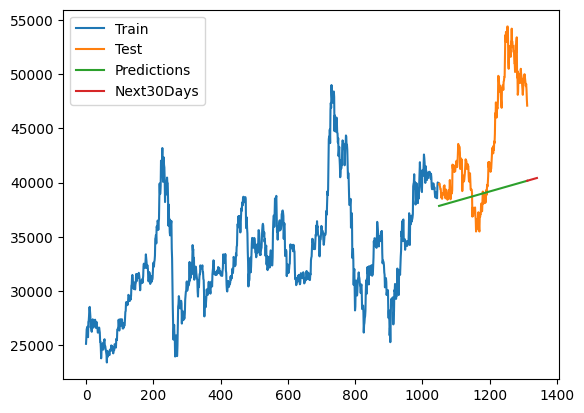

In [13]:
# 8.1. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Days'])
plt.show()

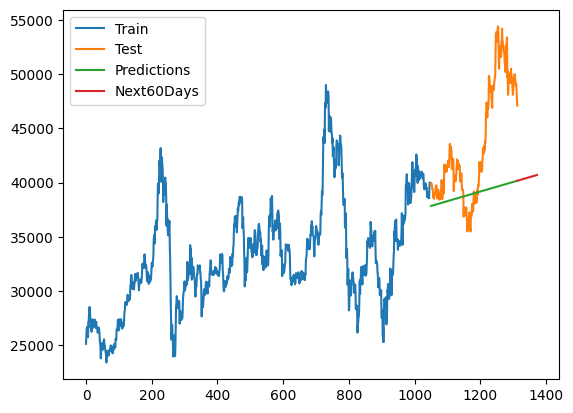

In [14]:
# 8.2. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Days'])
plt.show()

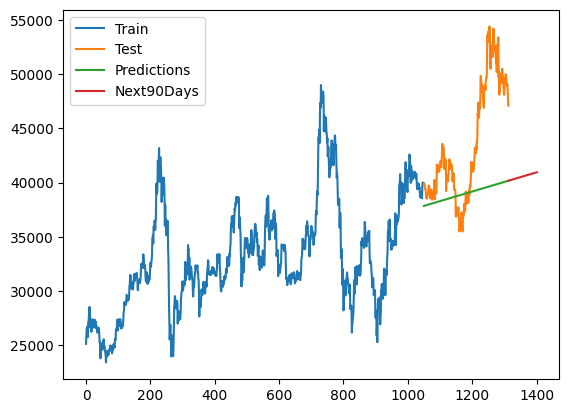

In [15]:
# 8.3. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Days'])
plt.show()